## First, I clone the data and I install necessary modules

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [ ]:

df = pd.read_csv("hf://datasets/lukebarousse/data_jobs/data_jobs.csv")

## Here I'm testing to see if the dataframe is installed

In [4]:
df.head(3)


,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,NaN,NaN,NaN,Boehringer Ingelheim,NaN,NaN
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,NaN,NaN,NaN,Hewlett Packard Enterprise,"['r', 'python', 'sql', 'nosql', 'power bi', 't...","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,NaN,NaN,NaN,ALPHA Augmented Services,"['python', 'sql', 'c#', 'azure', 'airflow', 'd...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."


## Filter for Canadian Data Analyst Roles

## Since this isn't too large of a dataset for my computer, I will make a copy and work with it

In [7]:
df_copy = df.copy()

df_CA = df_copy[df_copy['job_country'] == 'Canada'].copy()

df_CA.head(3)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
50,Machine Learning Engineer,Sr ML Engineer - Research & NLP (Remote),"Toronto, ON, Canada",via Careers At BenchSci,Full-time,False,Canada,2023-08-24 13:40:48,False,False,Canada,NaN,NaN,NaN,BenchSci,"['python', 'sql', 'pytorch', 'pandas']","{'libraries': ['pytorch', 'pandas'], 'programm..."
59,Data Engineer,Data Engineer with Dremio Experience,"Toronto, ON, Canada",via LinkedIn,Contractor,False,Canada,2023-08-28 13:35:13,True,False,Canada,NaN,NaN,NaN,Iris Software Inc.,"['sql', 'hadoop', 'kubernetes']","{'libraries': ['hadoop'], 'other': ['kubernete..."
81,Data Analyst,Business Data Analyst,"Regina, SK, Canada",via ZipRecruiter,Full-time,False,Canada,2023-03-01 13:28:04,False,False,Canada,NaN,NaN,NaN,027 Parks Culture and Sport,NaN,NaN


## Here I visualize the data pertaining to Canada

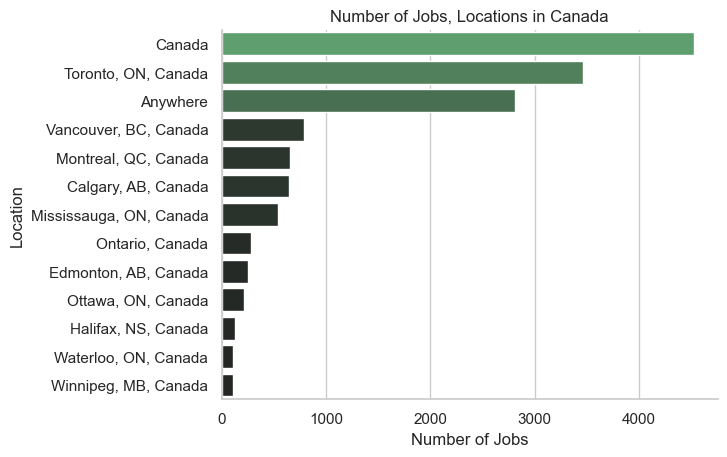

In [45]:
df_CA_plot = df_CA["job_location"].value_counts().head(13).to_frame()

sns.set_theme(style='whitegrid')
sns.barplot(data=df_CA_plot, x='count', y='job_location', hue='count', palette='dark:g', legend=False)
sns.despine()
plt.title('Number of Jobs, Locations in Canada')
plt.xlabel('Number of Jobs')
plt.ylabel('Location')
plt.show()

## Now I am interested in which jobs allow you to work from home

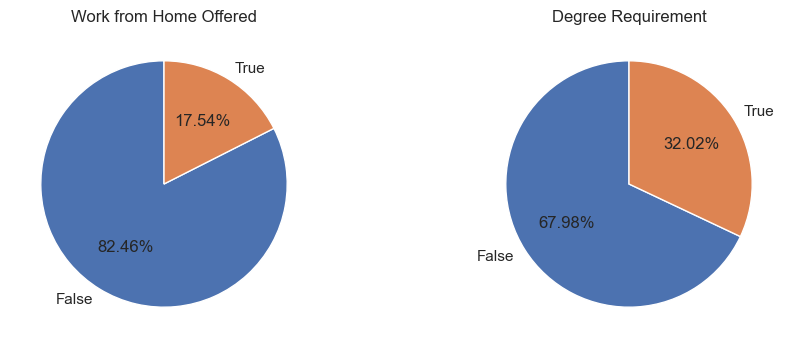

In [58]:
dict_my_preference_column = {
'job_work_from_home': 'Work from Home Offered',
'job_no_degree_mention': 'Degree Requirement',
}

fig, ax = plt.subplots(1,2)
fig.set_size_inches(11,4)

for i, (column,title) in enumerate(dict_my_preference_column.items()):
    ax[i].pie(df_CA[column].value_counts(), labels=['False', 'True'], autopct='%1.2f%%', startangle=90)
    ax[i].set_title(title)

plt.show()

## Now lets have a look at which companies are creating a lot of job posts

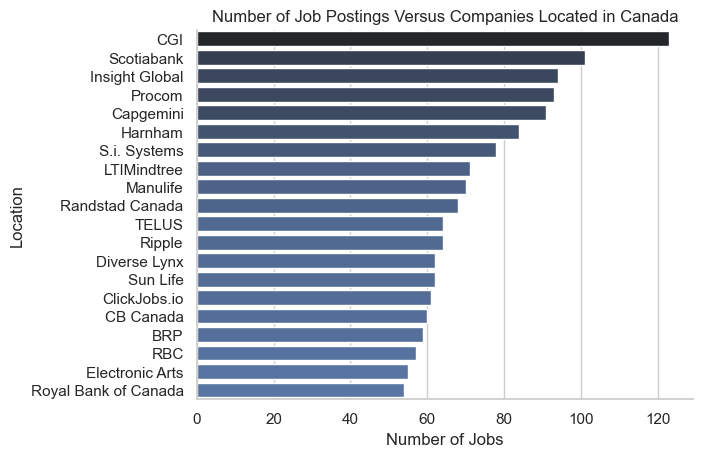

In [60]:
df_CA_plot = df_CA["company_name"].value_counts().head(20).to_frame()

sns.set_theme(style='whitegrid')
sns.barplot(data=df_CA_plot, x='count', y='company_name', hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.title('Number of Job Postings Versus Companies Located in Canada')
plt.xlabel('Number of Jobs')
plt.ylabel('Location')
plt.show()